In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error


In [2]:
# Read in Churn data set
df = pd.read_csv('/content/churn_clean.csv')

In [3]:
# Review all columns in dataset
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [4]:
# Rename 'item' survey questions to apporiate names
df.rename(columns={
    'Item1': 'Timely response',
    'Item2': 'Timely fixes',
    'Item3': 'Timely replacements',
    'Item4': 'Reliability',
    'Item5': 'Options',
    'Item6': 'Respectful response',
    'Item7': 'Courteous exchange',
    'Item8': 'Evidence of active listening',
}, inplace=True)

In [5]:
# See number or rows and columns
df.shape

(10000, 50)

In [6]:
# Check for any missing values or null values
# Also will see if the rename of columns of 'Item1'-'Item8' has new value names
df.isnull().sum()

CaseOrder                       0
Customer_id                     0
Interaction                     0
UID                             0
City                            0
State                           0
County                          0
Zip                             0
Lat                             0
Lng                             0
Population                      0
Area                            0
TimeZone                        0
Job                             0
Children                        0
Age                             0
Income                          0
Marital                         0
Gender                          0
Churn                           0
Outage_sec_perweek              0
Email                           0
Contacts                        0
Yearly_equip_failure            0
Techie                          0
Contract                        0
Port_modem                      0
Tablet                          0
InternetService                 0
Phone         

In [7]:
# View statistics of the data
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [8]:
# Drop unwanted columns 
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
                 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 
                 'Job'])

In [9]:
# Print all object data type and their unique values
for column in df.columns:
  if df[column].dtypes == object:
    print(str(column) + ' : ' + str(df[column].unique()))
    print(df[column].value_counts())
    print('_________________________________________________')

Marital : ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64
_________________________________________________
Gender : ['Male' 'Female' 'Nonbinary']
Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64
_________________________________________________
Churn : ['No' 'Yes']
No     7350
Yes    2650
Name: Churn, dtype: int64
_________________________________________________
Techie : ['No' 'Yes']
No     8321
Yes    1679
Name: Techie, dtype: int64
_________________________________________________
Contract : ['One year' 'Month-to-month' 'Two Year']
Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64
_________________________________________________
Port_modem : ['Yes' 'No']
No     5166
Yes    4834
Name: Port_modem, dtype: int64
______________________________________________

In [10]:
df.columns

    

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely response', 'Timely fixes',
       'Timely replacements', 'Reliability', 'Options', 'Respectful response',
       'Courteous exchange', 'Evidence of active listening'],
      dtype='object')

In [11]:
# Seperate numerical data for pair plots
# This will also help for the process to speed up
num_features = df[[
                   'Children', 'Age', 'Income',
                   'Outage_sec_perweek','Email', 
                   'Contacts', 'Yearly_equip_failure',
                   'MonthlyCharge'
                   
]]

num_features_2 = df[[
              'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year','Churn'       
]]

num_features_3 = df[[
                  'Timely response','Timely fixes', 'Timely replacements', 
                   'Reliability', 'Options','Respectful response', 
                   'Courteous exchange','Evidence of active listening', 'MonthlyCharge'  
]]

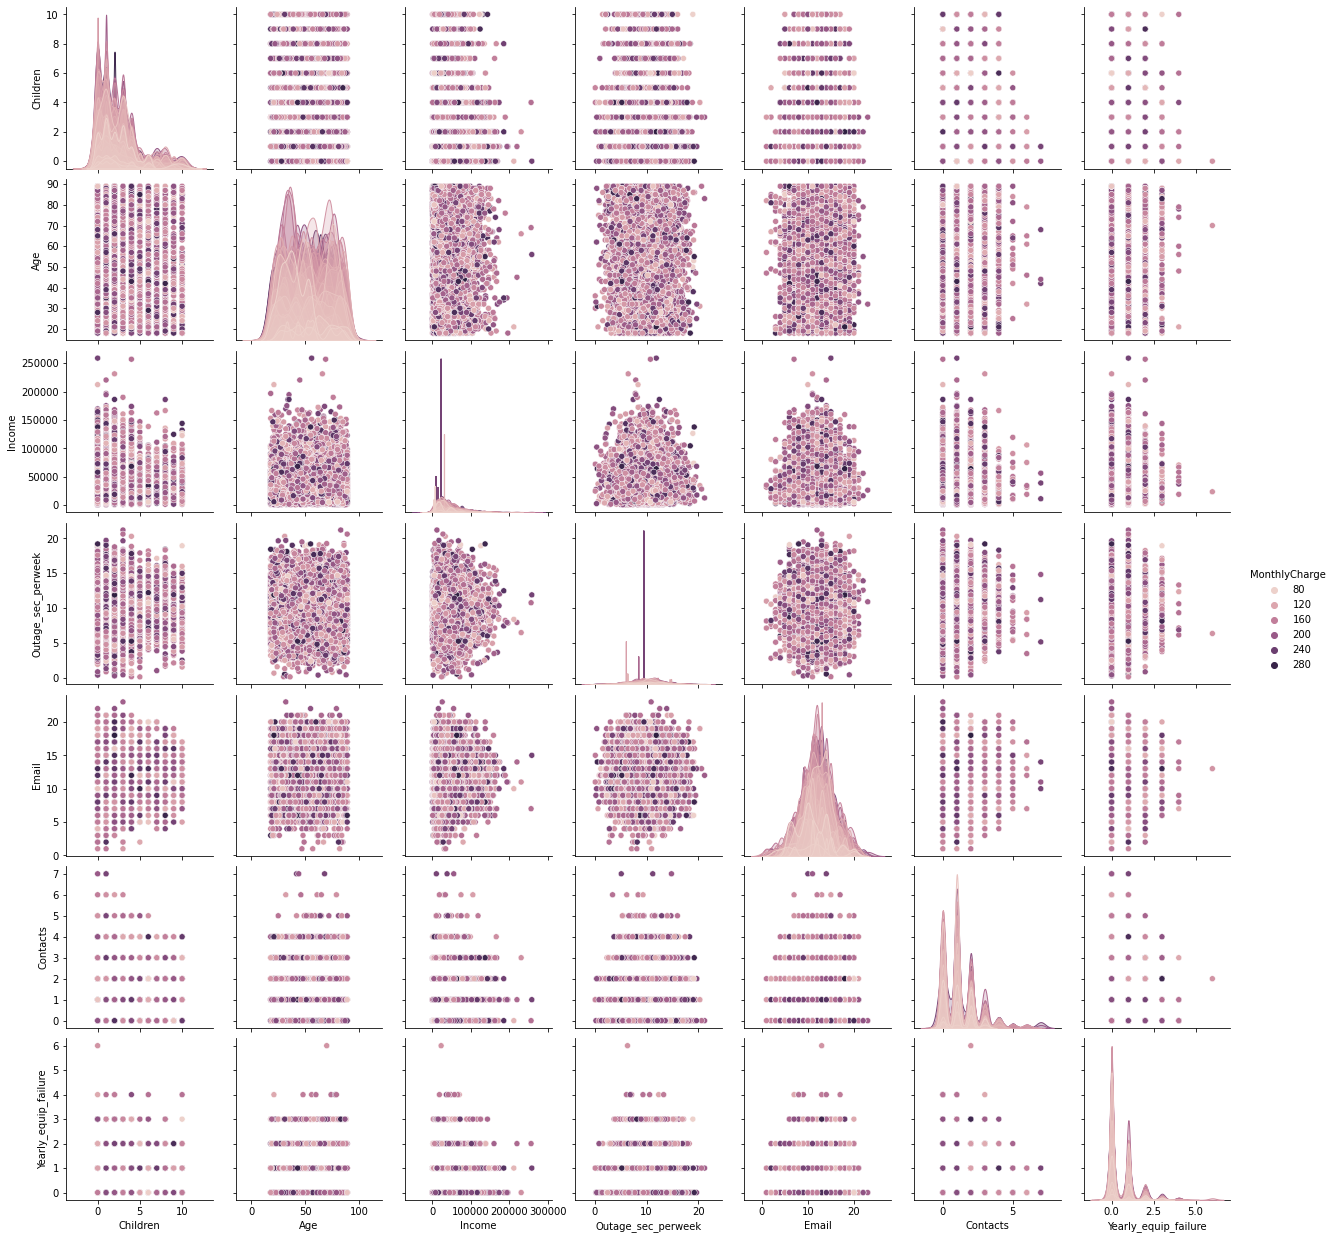

In [12]:
# Pair plots for relationships for first numerical featurs
sns.pairplot(num_features, hue='MonthlyCharge', diag_kws={'bw_method':0.2})

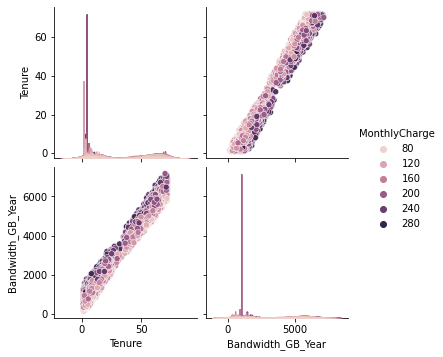

In [13]:
# Pair plots for relationships for second numerical featurs
sns.pairplot(num_features_2, hue='MonthlyCharge', diag_kws={'bw_method':0.2})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


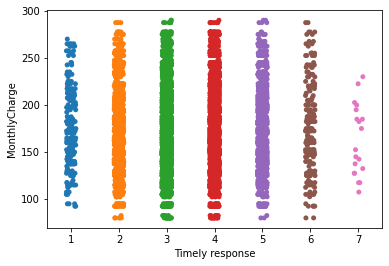

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


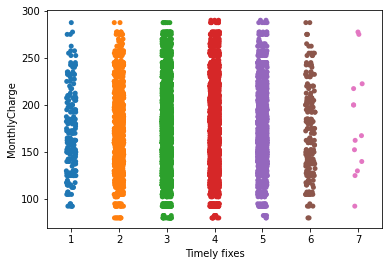

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


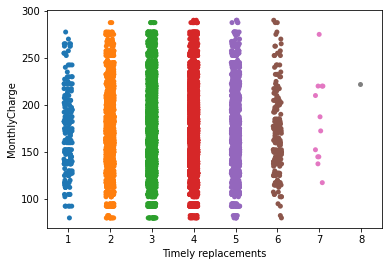

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


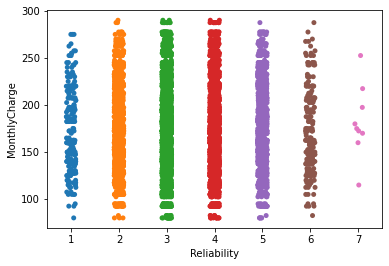

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


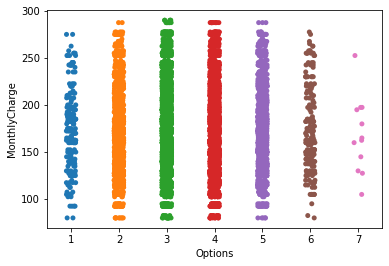

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


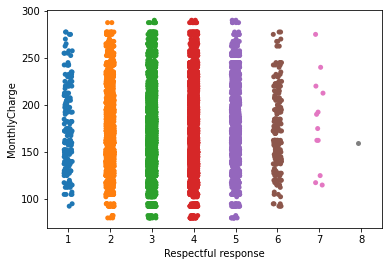

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


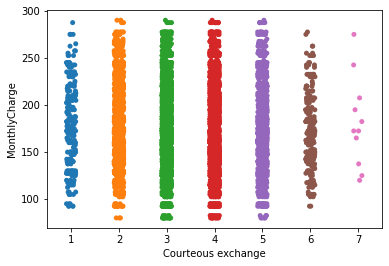

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


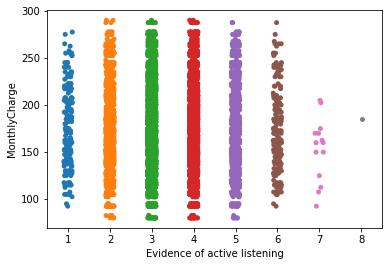

In [14]:
# Pair plots for relationships for third numerical features

sns.stripplot(num_features_3['Timely response'], num_features_3['MonthlyCharge'], jitter=True)
plt.show()
sns.stripplot(num_features_3['Timely fixes'], num_features_3['MonthlyCharge'],jitter=True)
plt.show()
sns.stripplot(num_features_3['Timely replacements'], num_features_3['MonthlyCharge'],jitter=True)
plt.show()
sns.stripplot(num_features_3['Reliability'], num_features_3['MonthlyCharge'],jitter=True)
plt.show()
sns.stripplot(num_features_3['Options'], num_features_3['MonthlyCharge'],jitter=True)
plt.show()
sns.stripplot(num_features_3['Respectful response'], num_features_3['MonthlyCharge'],jitter=True)
plt.show()
sns.stripplot(num_features_3['Courteous exchange'], num_features_3['MonthlyCharge'],jitter=True)
plt.show()
sns.stripplot(num_features_3['Evidence of active listening'], num_features_3['MonthlyCharge'],jitter=True)
plt.show()

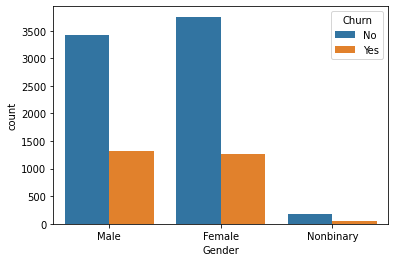

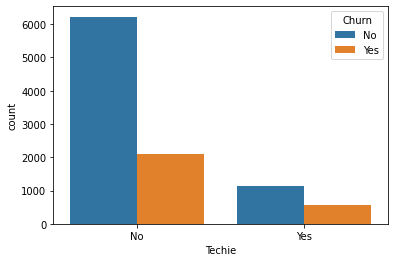

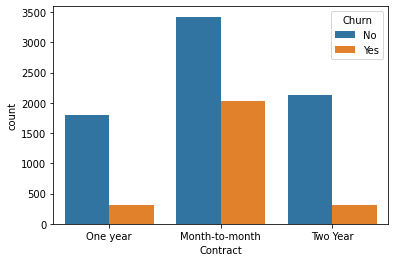

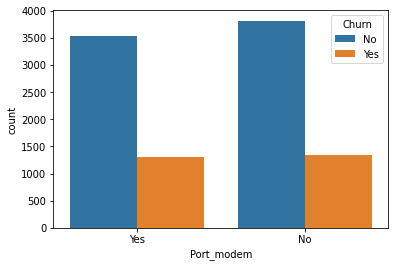

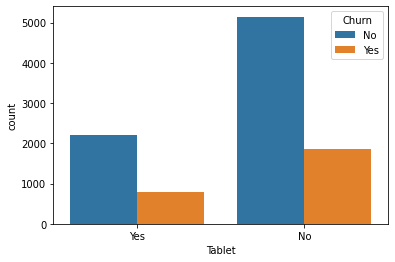

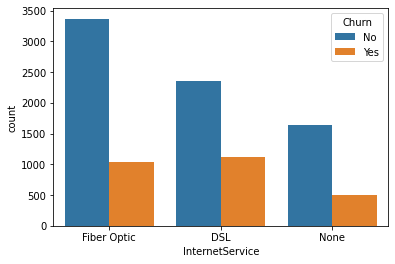

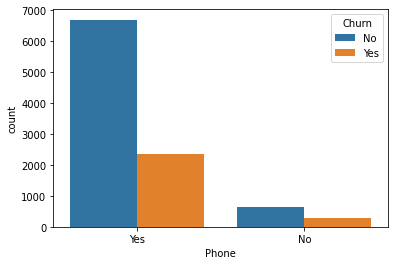

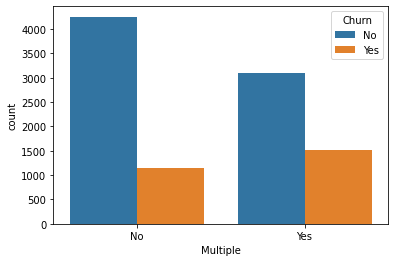

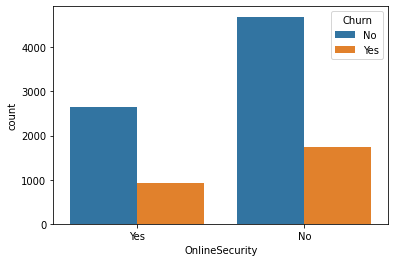

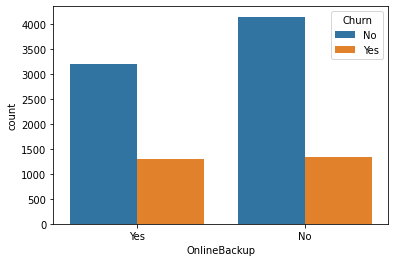

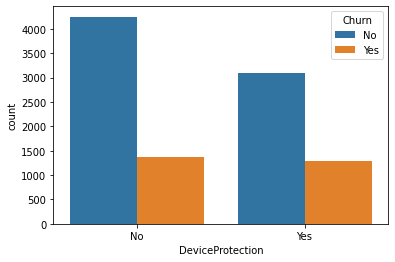

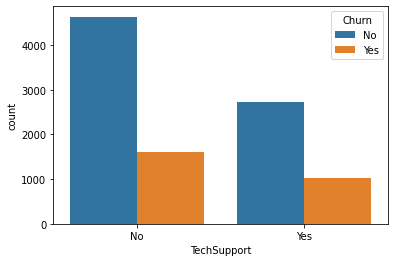

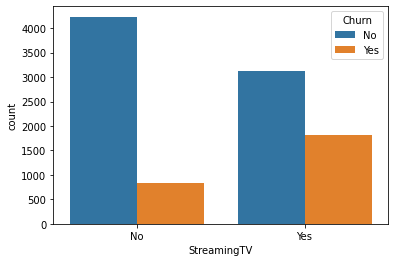

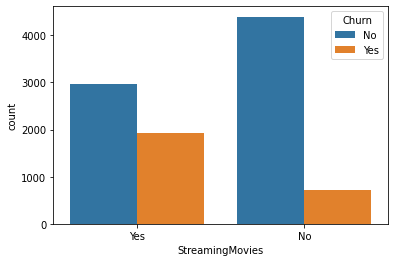

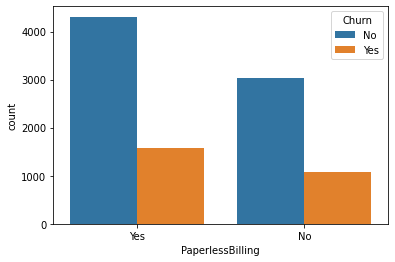

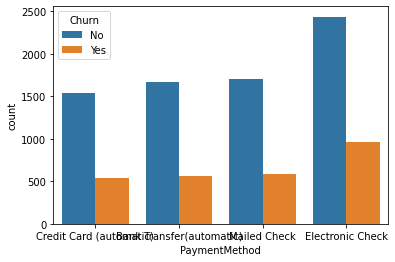

In [15]:
# Count plot for categorical features
cat_feats = df[[
                'Gender','Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
]]

for f in cat_feats:
  plt.figure()
  sns.countplot(x = f, data=df, hue='Churn')

In [16]:
# Transform categorical data to 1,0 
# First Churn and then rest of columns
df=df.replace({'Churn' : {'Yes': 1, 'No': 0}})
df_dv = pd.get_dummies(df)

In [17]:
# Move MonthlyCharge to end of list
df_dv = df_dv[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Tenure',
       'Bandwidth_GB_Year', 'Timely response', 'Timely fixes',
       'Timely replacements', 'Reliability', 'Options', 'Respectful response',
       'Courteous exchange', 'Evidence of active listening', 'Gender_Female',
       'Gender_Male', 'Gender_Nonbinary', 'Techie_No', 'Techie_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year',
       'Port_modem_No', 'Port_modem_Yes', 'Tablet_No', 'Tablet_Yes',
       'InternetService_DSL', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
       'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank Transfer(automatic)',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check', 'Churn', 'MonthlyCharge']]

In [18]:
df_dv.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn,MonthlyCharge
0,0,68,28561.99,7.978323,10,0,1,6.795513,904.536110,5,5,5,3,4,4,3,4,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,172.455519
1,1,27,21704.77,11.699080,12,0,1,1.156681,800.982766,3,4,3,3,4,3,4,4,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,242.632554
2,4,50,9609.57,10.752800,9,0,1,15.754144,2054.706961,4,4,2,4,4,3,3,3,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,159.947583
3,1,48,18925.23,14.913540,15,2,0,17.087227,2164.579412,4,4,4,2,5,4,3,3,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,119.956840
4,0,83,40074.19,8.147417,16,2,1,1.670972,271.493436,4,4,4,3,4,4,4,5,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1,149.948316


In [19]:
#Save a copy of the clean dataset
df_dv.to_csv('clean_prepared.csv')

In [20]:
#Split data 
X = df_dv.drop('MonthlyCharge', axis=1).values # Input feats
y = df_dv['MonthlyCharge'].values # Target value

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=0)


In [25]:
# Initial decision tree model
def get_decision_model(y_train,X_train,X_test):
  dt = DecisionTreeRegressor(random_state=0)
  model = dt.fit(X_train, y_train)
  for i, item in enumerate(df_dv.drop('MonthlyCharge', axis=1)):
    print("Importance of feature {}:, {:.3f}".format(column,dt.feature_importances_[i]))
    fi = pd.DataFrame({'Variable' : [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    try:
      final_fi = pd.concat([final_fi, fi], ignore_index=True)
    except:
      final_fi = fi

  final_fi= final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()
  final_fi
  print("__________________________________________________")
  print("Training Accuracy is: ", model.score(X_train, y_train))
  print("Testing Accuracy is: ", model.score(X_test, y_test))
  y_pred = model.predict(X_test)
  arr = np.c_[y_pred,y_test]
  print("\nPredicted and Actual values:\n", arr)
  print("\nMean Squared Error:\n", mean_squared_error(y_test, y_pred))
  print("\nRoot Mean Squared Error:\n", math.sqrt(mean_squared_error(y_test, y_pred)))
  print("\nR2 Score:\n", r2_score(y_test, y_pred))
  print("__________________________________________________")
  fix, ax = plt.subplots(figsize=(8,5))
  g = sns.regplot(y=y_test,x=y_pred,ax = ax)
  g.set_xlabel("Predictions", fontsize=15)
  g.set_ylabel("Residual",fontsize=15)
  plt.show()
  return model, arr

# Compare initail with linear model
def get_linear_model(y_train,X_train,X_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  print("Training Accuracy is: ", model.score(X_train, y_train))
  print("Testing Accuracy is: ", model.score(X_test, y_test))
  y_pred = model.predict(X_test)
  intercept = model.intercept_
  print("\nPredicted and Actual values:\n", np.c_[y_pred, y_test])
  print("\nMean Squared Error:\n", mean_squared_error(y_test, y_pred))
  print("\nRoot Mean Squared Error:\n", math.sqrt(mean_squared_error(y_test, y_pred)))
  print("\nR2 Score:\n", r2_score(y_test, y_pred))
  fix, ax = plt.subplots(figsize=(8,5))
  g = sns.regplot(x=y_pred, y=y_test,color="g", ax = ax)
  g.set_xlabel("Predictions", fontsize=15)
  g.set_ylabel("Test",fontsize=15)
  print("__________________________________________________")
  fix, ax = plt.subplots(figsize=(8,5))
  g = sns.regplot(x=y_pred, y=y_test-y_pred,color="red", ax = ax)
  g.set_xlabel("Predictions", fontsize=15)
  g.set_ylabel("Residual",fontsize=15)
  plt.show()
  return model, intercept

Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.000
Importance of feature Evidence of active listening:, 0.0

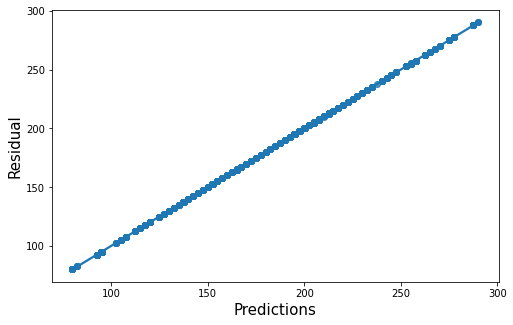

In [22]:
#Display initial decision tree model
model_dt, arr_sm = get_decision_model(y_train,X_train,X_test)


Training Accuracy is:  0.9955048609952436
Testing Accuracy is:  0.9955089776998169

Predicted and Actual values:
 [[196.02661313 197.4876    ]
 [141.41672873 144.960655  ]
 [196.01961008 200.1323    ]
 ...
 [206.22040062 202.4433    ]
 [188.43123569 184.9785    ]
 [146.0904102  150.0208    ]]

Mean Squared Error:
 8.282404292192126

Root Mean Squared Error:
 2.87791665831242

R2 Score:
 0.9955089776998169
__________________________________________________


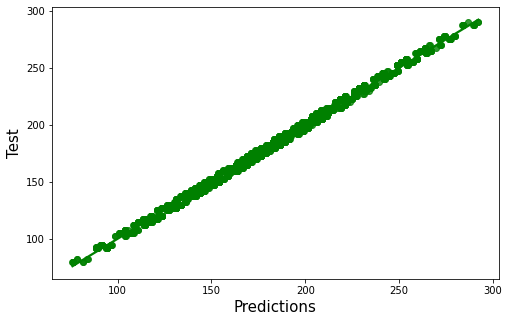

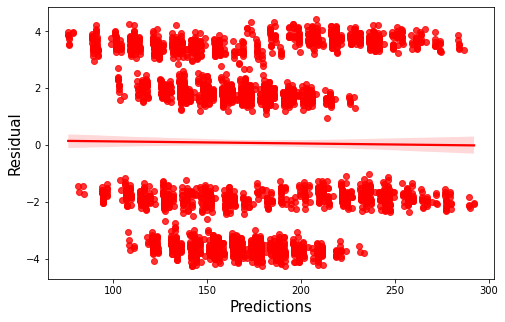

In [26]:
#Display information for linear regression model to see how accurate our initial model is
model_lr, intercept = get_linear_model(y_train,X_train,X_test)